In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


print(colored('\nAll libraries imported succesfully.', 'red'))


All libraries imported succesfully.


In [2]:
data = pd.read_csv('../data/Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
from sklearn.preprocessing import StandardScaler


# Preprocessing: Convert categorical variables (if any) using one-hot encoding
# Note: No categorical variables found in this dataset

# Standardize numerical variables using StandardScaler
scaler = StandardScaler()
numerical_columns = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the preprocessed dataset
print("\nPreprocessed dataset:")
print(data.head())

# Save the preprocessed dataset to a new CSV file if needed
# data.to_csv('preprocessed_dataset.csv', index=False)



Preprocessed dataset:
   Unnamed: 0      crim        zn     indus  chas       nox        rm  \
0           1 -0.419782  0.284830 -1.287909     0 -0.144217  0.413672   
1           2 -0.417339 -0.487722 -0.593381     0 -0.740262  0.194274   
2           3 -0.417342 -0.487722 -0.593381     0 -0.740262  1.282714   
3           4 -0.416750 -0.487722 -1.306878     0 -0.835284  1.016303   
4           5 -0.412482 -0.487722 -1.306878     0 -0.835284  1.228577   

        age       dis       rad       tax   ptratio     black     lstat  \
0 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562   
1  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439   
2 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727   
3 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517   
4 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501   

       medv  
0  0.159686  
1 -0.101524  
2  1.324247  
3  1.182758  
4  1.487503  


In [4]:

# Display basic information about the dataset
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])
print("\nData types of columns:")
print(data.dtypes)
print("\nMemory usage:")
print(data.memory_usage())
print("\nFirst k samples of the dataset:")
k = 5  # Change k to display a different number of samples
print(data.head(k))


Number of rows: 506
Number of columns: 15

Data types of columns:
Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad           float64
tax           float64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

Memory usage:
Index          132
Unnamed: 0    4048
crim          4048
zn            4048
indus         4048
chas          4048
nox           4048
rm            4048
age           4048
dis           4048
rad           4048
tax           4048
ptratio       4048
black         4048
lstat         4048
medv          4048
dtype: int64

First k samples of the dataset:
   Unnamed: 0      crim        zn     indus  chas       nox        rm  \
0           1 -0.419782  0.284830 -1.287909     0 -0.144217  0.413672   
1           2 -0.417339 -0.487722 -0.593381     0 -0.740262  0.194274   
2     

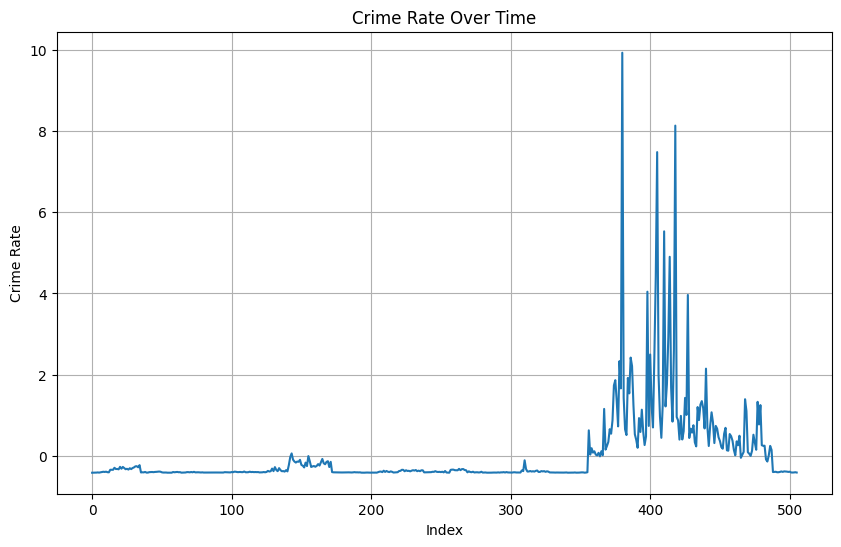

In [5]:

import matplotlib.pyplot as plt



# Plotting a line chart for a specific column (e.g., 'crim' column)
plt.figure(figsize=(10, 6))
plt.plot(data['crim'])
plt.title('Crime Rate Over Time')
plt.xlabel('Index')
plt.ylabel('Crime Rate')
plt.grid(True)
plt.show()


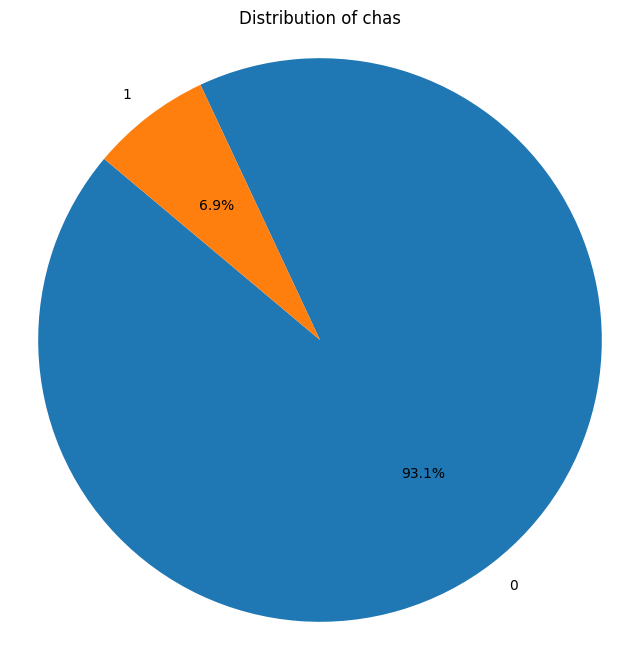

In [6]:
import matplotlib.pyplot as plt


# Choose a column for which you want to create a pie chart (e.g., 'chas' column)
column_name = 'chas'

# Count the occurrences of unique values in the chosen column
value_counts = data[column_name].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of ' + column_name)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

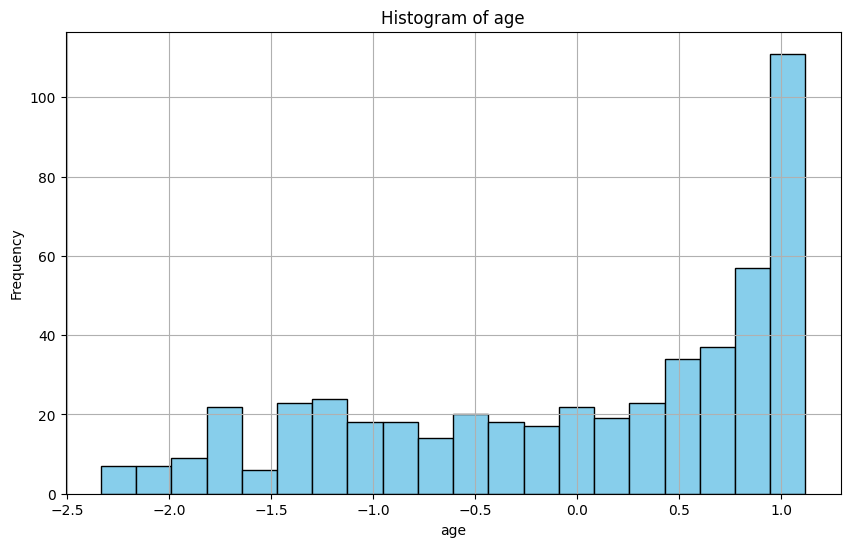

In [7]:
# Choose a column for which you want to create a histogram (e.g., 'age' column)
column_name = 'age'

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

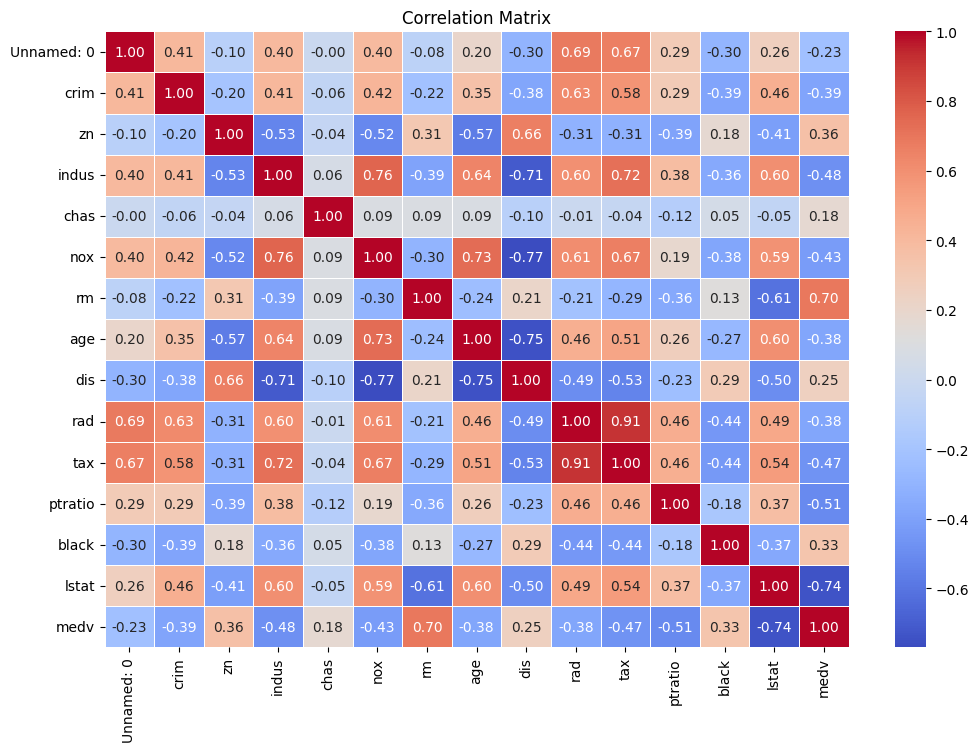

In [8]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Print the column names of the dataset
print("Column names:", data.columns)

Column names: Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [11]:
from sklearn.model_selection import train_test_split



# Define the features (X) and the target variable (y)
X = data.drop(columns=['age'])  # Replace 'target_column' with the name of your target variable
y = data['age']  # Replace 'target_column' with the name of your target variable

# Split the dataset into training data and test data (e.g., 80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)


Shape of training data: (404, 14)
Shape of test data: (102, 14)


In [12]:
# Convert 'age' column from years to months
data['age'] = data['age'] * 12  # Assuming 'age' is in years, convert it to months

# Display the modified dataset after conversion
print("\nModified dataset after converting 'age' column:")
print(data.head())


Modified dataset after converting 'age' column:
   Unnamed: 0      crim        zn     indus  chas       nox        rm  \
0           1 -0.419782  0.284830 -1.287909     0 -0.144217  0.413672   
1           2 -0.417339 -0.487722 -0.593381     0 -0.740262  0.194274   
2           3 -0.417342 -0.487722 -0.593381     0 -0.740262  1.282714   
3           4 -0.416750 -0.487722 -1.306878     0 -0.835284  1.016303   
4           5 -0.412482 -0.487722 -1.306878     0 -0.835284  1.228577   

        age       dis       rad       tax   ptratio     black     lstat  \
0 -1.440161  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562   
1  4.405997  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439   
2 -3.189741  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727   
3 -9.718662  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517   
4 -6.134156  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501   

       medv  
0  0.159686  
1 -0.101524  
2  1.324247  
3  1.

In [13]:
# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['medv'])  # Features
y = data['medv']  # Target variable

# Split the dataset into training data and test data (e.g., 80% training, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames for display
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the scaled training data
print("Scaled training data:")
print(X_train_scaled_df.head())

# Display the scaled test data
print("\nScaled test data:")
print(X_test_scaled_df.head())

Scaled training data:
   Unnamed: 0      crim    zn     indus  chas       nox        rm       age  \
0    0.944444  0.168763  0.00  0.642963   0.0  0.471193  0.293065  0.972194   
1    0.027778  0.006950  0.00  0.274074   0.0  0.314815  0.400854  0.552008   
2    0.656746  0.000288  0.35  0.197037   0.0  0.108848  0.440919  0.210093   
3    0.837302  0.079146  0.00  0.642963   0.0  0.471193  0.455562  0.846550   
4    0.035714  0.008056  0.00  0.274074   0.0  0.314815  0.379093  0.685891   

        dis       rad       tax   ptratio     black     lstat  
0  0.088307  1.000000  0.914122  0.808511  0.880428  0.639625  
1  0.306359  0.130435  0.229008  0.893617  0.996772  0.185982  
2  0.501150  0.000000  0.223282  0.457447  0.912628  0.168322  
3  0.081132  1.000000  0.914122  0.808511  0.005547  0.594923  
4  0.242514  0.130435  0.229008  0.893617  0.984997  0.263521  

Scaled test data:
   Unnamed: 0      crim   zn     indus  chas       nox        rm       age  \
0    0.341270  0.00093

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Define and initialize the CART model
cart_model = DecisionTreeRegressor(random_state=42)

# Train the CART model on the training data
cart_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred_cart = cart_model.predict(X_train_scaled)

# Calculate the mean squared error on the training set
mse_train_cart = mean_squared_error(y_train, y_train_pred_cart)
print("Mean Squared Error on training set (CART):", mse_train_cart)

Mean Squared Error on training set (CART): 4.393408506800189e-33


In [16]:
from sklearn.svm import SVR

# Define and initialize the SVM model
svm_model = SVR(kernel='rbf')

# Train the SVM model on the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred_svm = svm_model.predict(X_train_scaled)

# Calculate the mean squared error on the training set
mse_train_svm = mean_squared_error(y_train, y_train_pred_svm)
print("Mean Squared Error on training set (SVM):", mse_train_svm)

Mean Squared Error on training set (SVM): 0.16736075993598


In [17]:
# Make predictions on the test set using the CART model
y_test_pred_cart = cart_model.predict(X_test_scaled)

# Calculate the mean squared error on the test set for CART model
mse_test_cart = mean_squared_error(y_test, y_test_pred_cart)
print("Mean Squared Error on test set (CART):", mse_test_cart)

# Display a table showing actual values vs. predicted values for CART model
results_cart = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_cart})
print("\nResults for CART model:")
print(results_cart.head())


Mean Squared Error on test set (CART): 0.2864009743492247

Results for CART model:
       Actual  Predicted
173  0.116151   0.605919
274  1.073920   1.030385
491 -0.972224  -0.569525
72   0.029081  -0.057989
452 -0.700130  -0.525990


In [18]:
# Make predictions on the test set using the SVM model
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Calculate the mean squared error on the test set for SVM model
mse_test_svm = mean_squared_error(y_test, y_test_pred_svm)
print("Mean Squared Error on test set (SVM):", mse_test_svm)

# Display a table showing actual values vs. predicted values for SVM model
results_svm = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_svm})
print("\nResults for SVM model:")
print(results_svm.head())


Mean Squared Error on test set (SVM): 0.1798762815766532

Results for SVM model:
       Actual  Predicted
173  0.116151   0.408715
274  1.073920   1.100940
491 -0.972224  -0.656502
72   0.029081   0.107267
452 -0.700130  -0.673437


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error on the test set for CART model
mse_test_cart = mean_squared_error(y_test, y_test_pred_cart)
print("Mean Squared Error on test set (CART):", mse_test_cart)

# Calculate the R-squared (R^2) score on the test set for CART model
r2_test_cart = r2_score(y_test, y_test_pred_cart)
print("R-squared (R^2) Score on test set (CART):", r2_test_cart)


Mean Squared Error on test set (CART): 0.2864009743492247
R-squared (R^2) Score on test set (CART): 0.6703041613931591


In [20]:
# Calculate the mean squared error on the test set for SVM model
mse_test_svm = mean_squared_error(y_test, y_test_pred_svm)
print("Mean Squared Error on test set (SVM):", mse_test_svm)

# Calculate the R-squared (R^2) score on the test set for SVM model
r2_test_svm = r2_score(y_test, y_test_pred_svm)
print("R-squared (R^2) Score on test set (SVM):", r2_test_svm)


Mean Squared Error on test set (SVM): 0.1798762815766532
R-squared (R^2) Score on test set (SVM): 0.7929320539685676
